In [85]:
#import libraries
#The "TARGET" column is the variable to predict. It equals 0 for unsatisfied customers and 1 for satisfied customers.

#Models

from sklearn import decomposition
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample


#Transformation
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

#Graphics
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
%%time
#Loading the train Data set

df_train = pd.read_csv("DataSet/train.csv")
df_test = pd.read_csv("DataSet/Test.csv")
df_Y_test = pd.read_csv("DataSet/sample_submission.csv")

Wall time: 5.65 s


In [87]:
#76020 variables and 371 observations. 
df_train.shape

(76020, 371)

In [88]:
#Check types for all collumns - Only Int and Float
dataTypeSeries = set(df_train.dtypes)
dataTypeSeries


{dtype('int64'), dtype('float64')}

# Resempling

In [89]:
from sklearn.utils import resample
# Create oversampled training data set for minority class
#
#X_oversampled = resample(df_train[df_train['TARGET']==1],
#                   replace=True,
#                   n_samples=X_treino[df_train['TARGET']==0].shape[0],
#                   random_state=123)
#
# Append the oversampled minority class to training data and related labels
#
X_treino_up = resample(df_train, 
                        replace=True, 
                        n_samples=df_train['TARGET'].value_counts()[0],# to match majority class sample count
                        random_state=1) 


In [90]:
X_treino_balanced=pd.concat([df_train,X_treino_up[X_treino_up["TARGET"]==1]])


<AxesSubplot:ylabel='TARGET'>

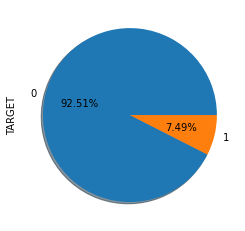

In [91]:
X_treino_balanced['TARGET'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

In [92]:
#Split in X and Y
Y_treino = X_treino_balanced["TARGET"]
X_treino = X_treino_balanced
X_treino.drop("TARGET", axis=1, inplace=True)
X_treino.index=X_treino["ID"]
X_treino.drop("ID", axis=1, inplace=True)
print(X_treino.shape, Y_treino.shape)

(78921, 369) (78921,)


In [93]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [94]:
#The test Dataset in this project was given with already splited in X and Y.
#Here we will drop the column ID

#Mudanças para X_Test
X_test = df_test
X_test.index = df_test["ID"]
X_test.drop("ID", axis=1, inplace=True)

#Mudanças para Y_test
Y_test=df_Y_test["TARGET"]



In [95]:
print(X_treino.shape, Y_treino.shape,X_test.shape, Y_test.shape)

(78921, 369) (78921,) (75818, 369) (75818,)


# Normalização dos dados

In [97]:
%%time

#Normalização de treino
scaler = StandardScaler()
X_treino_scaled = scaler.fit_transform(X_treino)
X_df_treino_scaled = pd.DataFrame(X_treino_scaled)
#Normalização de test
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_df_test_scaled = pd.DataFrame(X_test_scaled)

Wall time: 2.33 s


In [98]:
print(X_df_treino_scaled.shape,X_df_test_scaled.shape)

(78921, 369) (75818, 369)


# Redução da dimensionalidade

In [100]:
%%time
#Utilizando o PCA para reduzir a dimensionalidade

pca = decomposition.PCA()
pca.fit(X_df_treino_scaled)

Wall time: 4.84 s


PCA()

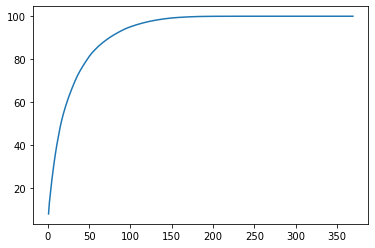

In [101]:
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.show()

In [102]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
d

146

In [103]:
%%time
pca = decomposition.PCA(n_components=d)
pca.fit(X_df_treino_scaled)

Wall time: 7.99 s


PCA(n_components=146)

In [104]:
%%time
X_treino_pca = pca.fit_transform(X_df_treino_scaled)
X_test_pca = pca.fit_transform(X_df_test_scaled)

Wall time: 14.5 s


In [105]:
# Shape
print(X_treino_pca.shape)
print(X_test_pca.shape)

(78921, 146)
(75818, 146)


In [106]:
X_treino_pca=pd.DataFrame(X_treino_pca)
X_test_pca=pd.DataFrame(X_test_pca)

# Criação dos Modelos

In [ ]:
%%time
#Randon Forest

randomForest = RandomForestClassifier(n_estimators = 200)
randomForest = randomForest.fit(X_treino_pca, Y_treino)
score = randomForest.score(X_test_pca , Y_test)
print(score)

In [31]:
%%time
y_predict = randomForest.predict(X_test_pca)

Wall time: 3.65 s


In [32]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(Y_test,y_predict, labels=[0, 1]))
print(classification_report(Y_test, y_predict))

[[75818     0]
 [    0     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75818

    accuracy                           1.00     75818
   macro avg       1.00      1.00      1.00     75818
weighted avg       1.00      1.00      1.00     75818



<AxesSubplot:>

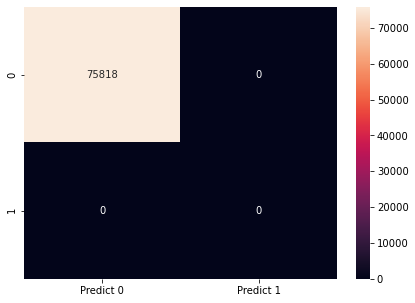

In [33]:
from sklearn import metrics
import seaborn as sns
cm=metrics.confusion_matrix(Y_test,y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## SVM - Suport vetor Machine

In [34]:
%%time
#ML com SVM
# Cria o modelo
modelo_svm = svm.SVC(C = 5., gamma = 0.001)
# Treinamento do modelo
modelo_svm.fit(X_treino_pca, Y_treino)

Wall time: 1h 3min 14s


SVC(C=5.0, gamma=0.001)

In [35]:
%%time
#Previsões
previsoes = modelo_svm.predict(X_test_pca)

Wall time: 5min 52s


In [36]:
%%time
print(modelo_svm.score(X_test_pca, Y_test))

1.0
Wall time: 5min 49s


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
# Criando o modelo
modelo_xg = XGBClassifier()

# Treinando o modelo
modelo_xg.fit(X_treino_pca, Y_treino)

# Pront do modelo
print(modelo_xg)

# Fazendo previsões
y_pred = modelo_xg.predict(X_test_pca)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(Y_test, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))